<div style="text-align: center; font-size:300%"> Title </div>
<br>
<div style="text-align: center; font-size:200%"> CMSC 320 </div>
<br>
<div style="text-align: center; font-size:200%"> Michael Suehle and Nathan Valencia </div>

# Introduction

# Data Collection
Here we scrape the website for the table we need. We do this easily using code from project 1.

In [38]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from IPython.core.display import HTML,display

val_request = requests.get('https://www.vlr.gg/stats')
root = BeautifulSoup(val_request.content, 'html.parser')
table = root.find('table')

Note that the agents are not read in. We should do something about that

In [39]:
val_data = pd.read_html(str(table))[0]
val_data.tail()

,Player,Agents,Rnd,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD
831,koldamenta GUILD,NaN,257,146.6,0.72,68%,95.2,0.53,0.38,0.05,0.12,21%,21%,6/28,29,136,188,98,13,30
832,Night Dead,(+2),414,137.5,0.64,69%,89.8,0.46,0.36,0.05,0.07,19%,8%,5/60,16,189,297,147,21,27
833,MEDC Flui,NaN,237,136.2,0.51,55%,94.7,0.44,0.26,0.05,0.12,16%,3%,1/29,18,105,207,61,12,28
834,azez Wind,(+1),427,131.7,0.54,59%,96.6,0.42,0.30,0.04,0.11,19%,19%,10/53,25,181,333,128,19,47
835,glovee SMB,NaN,212,125.9,0.59,57%,87.4,0.44,0.23,0.04,0.11,26%,6%,1/18,21,94,158,48,9,23


In [40]:
#lets get those agents
agent_table = table.findAll('td','mod-agents')
agents_col = []

for row in agent_table:
    agents = []

    for img in row.findAll('img'):
        agents.append('<img src="https://www.vlr.gg'+img['src']+'" width="30" >')
    
    agents_col.append(agents)

val_data['agent_img_tags'] = agents_col
display(HTML(val_data.head().to_html(escape=False)))

,Player,Agents,Rnd,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD,agent_img_tags
0,JohnOlsen FS,NaN,355,298.9,1.59,76%,181.4,1.07,0.14,0.25,0.14,30%,13%,3/23,31,381,239,48,88,48,[]
1,BABYBAY FaZe,NaN,608,297.2,1.44,75%,187.9,1.02,0.18,0.25,0.17,23%,11%,4/35,30,619,429,110,150,103,"[, , ]"
2,enerii,NaN,415,290.3,1.39,77%,183.9,1.00,0.24,0.24,0.14,23%,33%,4/12,27,417,300,100,101,59,"[, , ]"
3,dodonut TSM.X,NaN,284,283.6,1.65,75%,180.3,1.01,0.20,0.27,0.12,19%,25%,11/44,30,287,174,56,76,33,"[, ]"
4,whz Toe,NaN,221,281.3,1.23,70%,184.0,1.00,0.17,0.22,0.15,33%,17%,4/24,30,222,180,38,49,34,[]


### Data Wrangling
Here we add the names of the agents along with their classes.

Below I am going to fill the Agents column with names of the agents

In [41]:
import re
import math

new_agents = []
for i, row in val_data.iterrows():
    agent_names = []
    img_tags = row['agent_img_tags']
    for tag in img_tags:
        match = re.search(r'<img src="https:\/\/www\.vlr\.gg\/img\/vlr\/game\/agents\/([A-Za-z]+)\.png" width="30" >', tag)
        agent_names.append(match.group(1))
        
    if isinstance(row['Agents'], str):
        agent_names.append(row['Agents'])
        
    new_agents.append(agent_names)

val_data.drop('Agents', axis=1)
val_data['Agents'] = new_agents
display(HTML(val_data.head().to_html(escape=False))) #in final proj, we should print the table as little as possible but this is here for testing

,Player,Agents,Rnd,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,HS%,CL%,CL,KMax,K,D,A,FK,FD,agent_img_tags
0,JohnOlsen FS,[jett],355,298.9,1.59,76%,181.4,1.07,0.14,0.25,0.14,30%,13%,3/23,31,381,239,48,88,48,[]
1,BABYBAY FaZe,"[jett, raze, chamber]",608,297.2,1.44,75%,187.9,1.02,0.18,0.25,0.17,23%,11%,4/35,30,619,429,110,150,103,"[, , ]"
2,enerii,"[reyna, raze, jett]",415,290.3,1.39,77%,183.9,1.00,0.24,0.24,0.14,23%,33%,4/12,27,417,300,100,101,59,"[, , ]"
3,dodonut TSM.X,"[jett, chamber]",284,283.6,1.65,75%,180.3,1.01,0.20,0.27,0.12,19%,25%,11/44,30,287,174,56,76,33,"[, ]"
4,whz Toe,[jett],221,281.3,1.23,70%,184.0,1.00,0.17,0.22,0.15,33%,17%,4/24,30,222,180,38,49,34,[]


Now I map the agents to their classes and add a column for that

In [42]:
classes = {'phoenix':'duelist',
           'jett':'duelist',
           'viper':'controller',
           'sova':'initiator',
           'cypher':'sentinel',
           'brimstone':'controller',
           'sage':'sentinel',
           'omen':'controller',
           'raze':'duelist',
           'breach':'initiator',
           'astra':'controller',
           'chamber':'sentinel',
           'kayo':'initiator',
           'killjoy':'sentinel',
           'neon':'duelist',
           'reyna':'duelist',
           'skye':'initiator',
           'yoru':'duelist'}

class_names_column = []
for i, row in val_data.iterrows():
    class_names = []
    
    for name in row['Agents']:
        if name in classes.keys():
            class_names.append(classes[name])
            
    class_names_column.append(class_names)
    
val_data['classes'] = class_names_column
val_data.head()

,Player,Agents,Rnd,ACS,K:D,KAST,ADR,KPR,APR,FKPR,...,CL%,CL,KMax,K,D,A,FK,FD,agent_img_tags,classes
0,JohnOlsen FS,[jett],355,298.9,1.59,76%,181.4,1.07,0.14,0.25,...,13%,3/23,31,381,239,48,88,48,"[<img src=""https://www.vlr.gg/img/vlr/game/age...",[duelist]
1,BABYBAY FaZe,"[jett, raze, chamber]",608,297.2,1.44,75%,187.9,1.02,0.18,0.25,...,11%,4/35,30,619,429,110,150,103,"[<img src=""https://www.vlr.gg/img/vlr/game/age...","[duelist, duelist, sentinel]"
2,enerii,"[reyna, raze, jett]",415,290.3,1.39,77%,183.9,1.00,0.24,0.24,...,33%,4/12,27,417,300,100,101,59,"[<img src=""https://www.vlr.gg/img/vlr/game/age...","[duelist, duelist, duelist]"
3,dodonut TSM.X,"[jett, chamber]",284,283.6,1.65,75%,180.3,1.01,0.20,0.27,...,25%,11/44,30,287,174,56,76,33,"[<img src=""https://www.vlr.gg/img/vlr/game/age...","[duelist, sentinel]"
4,whz Toe,[jett],221,281.3,1.23,70%,184.0,1.00,0.17,0.22,...,17%,4/24,30,222,180,38,49,34,"[<img src=""https://www.vlr.gg/img/vlr/game/age...",[duelist]


# Data Processing
Imma plot da frequency of the classes

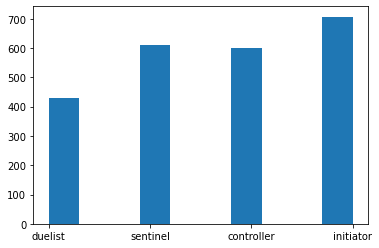

In [44]:
import matplotlib.pyplot as plt
all_classes = []

for class_list in val_data['classes']:
    all_classes = all_classes + class_list

plt.hist(all_classes)
plt.show()

# Analysis

# Insights

# Additional Resources